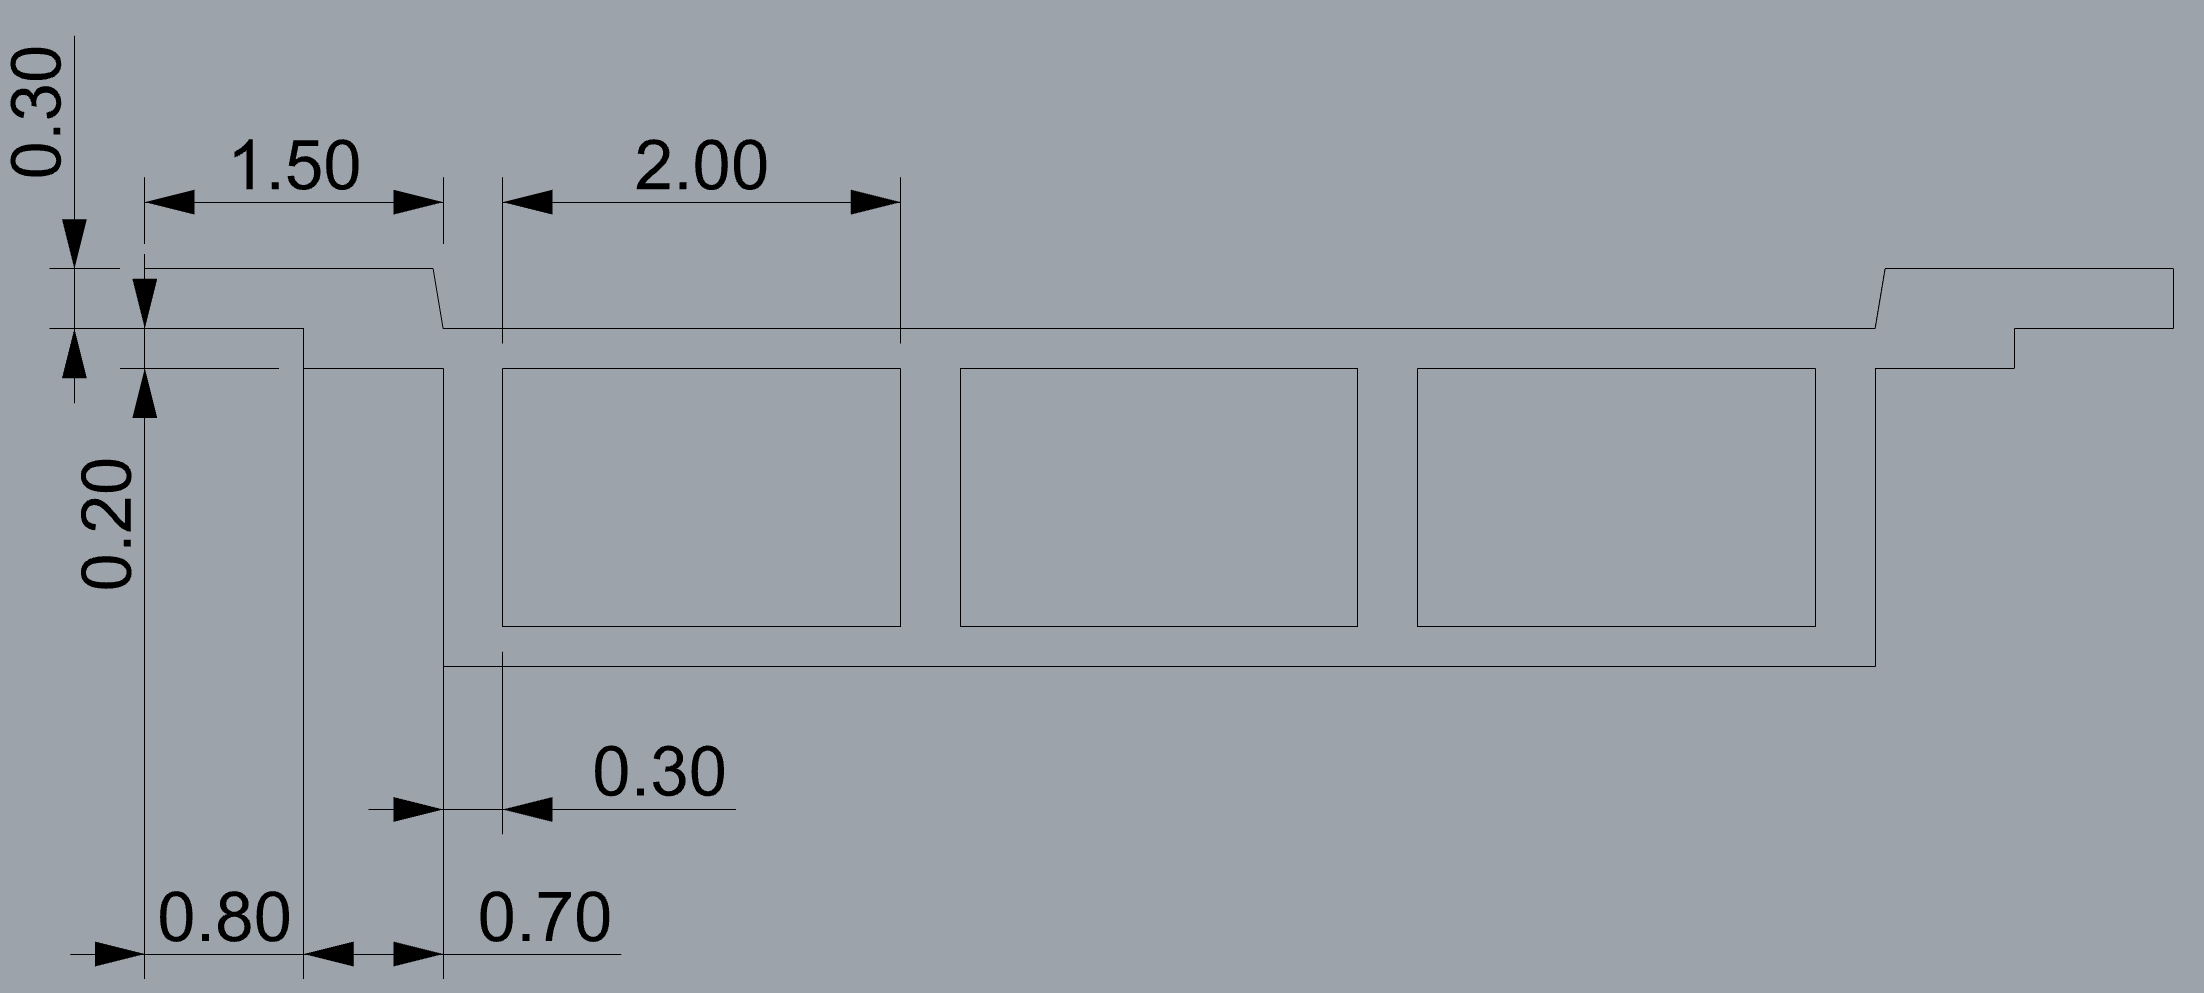

*Podemos colocar 2 capas de acero en la losa inferior*

In [41]:
lz=28

**Analisis Estructural**

*CAMION*

In [42]:
from sympy import *

r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*(lz-4.3)+3.6*(lz/2+4.3))/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m+14.8*4.3, 0), m)
m_c = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_c, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*4.3+3.6*8.6)/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1_c = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_c, 2))

Momento Maximo (tnf-m) = 192.84
Cortante Maximo (tnf) = 29.82


*TANDEM*

In [43]:
r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*lz/2+11.4*(lz/2+1.2))/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m, 0), m)
m_t = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_t, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*1.2)/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1_t = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_t, 2))

Momento Maximo (tnf-m) = 152.76
Cortante Maximo (tnf) = 22.31


*DISTRIBUIDA*

In [44]:
cv = 0.96  # Carga Distribuida (tnf-m)
m_cv = cv*lz**2/8
print('Momento Maximo (tnf-m) =', round(m_cv, 2))
r1_cv = cv*lz/2
print('Cortante Maximo (tnf) =', round(r1_cv, 2))

Momento Maximo (tnf-m) = 94.08
Cortante Maximo (tnf) = 13.44


---

Nota: El orden para la obtencion del *RESUMEN* de los momentos flectores y cortantes es el siguiente:
1. Camion de Diseño
2. Tandem
3. Maxima Carga
4. Maxima Carga + Carga Distribuida (Carga Viva) : LL
5. Carga de Impacto : IM

*MOMENTOS FLECTORES*

In [45]:
Data_1=[round(m_c,2),round(m_t,2),round(max(m_c,m_t),2),round(max(m_c,m_t)+m_cv,2),round(max(m_c,m_t)*0.33,2)]
Data_1

[192.84, 152.76, 192.84, 286.92, 63.64]

*CORTANTE*

In [46]:
Data_2=[round(r1_c,2),round(r1_t,2),round(max(r1_c,r1_t),2),round(max(r1_c,r1_t)+r1_cv,2),round(max(r1_c,r1_t)*0.33,2)]
Data_2

[29.82, 22.31, 29.82, 43.26, 9.84]

---

**Factores de Distribucion**

***MOMENTOS***

*VIGA INTERIOR*

In [47]:
Nc=3 # Numero de celdas
s=2.3 # Separacion entre ejes de vigas
gm_int=(13/Nc)**0.3*(s*100/43)*(1/(lz*1000))**0.25
print ('gm_int =',round(gm_int,2))

gm_int = 0.64


In [48]:
M_vi_LL=gm_int*Data_1[3]
M_vi_IM=gm_int*Data_1[4]
print ('M_vi_LL =',round(M_vi_LL,2))
print ('M_vi_IM =',round(M_vi_IM,2))

M_vi_LL = 184.19
M_vi_IM = 40.86


*VIGA EXTERIOR*

In [49]:
bw=0.3
vld=0.7+bw/2
we=s/2+vld # Mitad del espaciamiento % vigas mas el volado total
gm_ext=we*10/43
print ('gm_ext =',round(gm_ext,2))

gm_ext = 0.47


In [53]:
M_ve_LL=gm_ext*Data_1[3]
M_ve_IM=gm_ext*Data_1[4]
print ('M_ve_LL =',round(M_ve_LL,2))
print ('M_ve_IM =',round(M_ve_IM,2))

M_ve_LL = 133.45
M_ve_IM = 29.60


***CORTANTES***

*VIGA INTERIOR*

In [51]:
h=1.7 # altura hasta la losa (m)
d=h-0.1 # Peralte efectivo (m) :: 0.1 = 10 cm de Recubrimiento
gc_int=(s*10/22)**0.9*(d/lz)**0.1
print ('gc_int',round(gc_int,2))

gc_int 0.78


In [56]:
C_vi_LL=gc_int*Data_2[3]
C_vi_IM=gc_int*Data_2[4]
print ('C_vi_LL =',round(C_vi_LL,2))
print ('C_vi_IM =',round(C_vi_IM,2))

C_vi_LL = 33.82
C_vi_IM = 7.69


*VIGA EXTERIOR*

In [52]:
de=0.15 # Distancia desde la barrera :: Por seguridad
e=0.64+de*10/38
gc_ext=e*gc_int
print ('gc_ext',round(gc_ext,2))

gc_ext 0.53


In [57]:
C_ve_LL=gc_ext*Data_2[3]
C_ve_IM=gc_ext*Data_2[4]
print ('C_ve_LL =',round(C_ve_LL,2))
print ('C_ve_IM =',round(C_ve_IM,2))

C_ve_LL = 22.98
C_ve_IM = 5.23
